In [4]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

 # Import Libraries

In [6]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb



import warnings
warnings.filterwarnings('ignore')

 #  load dataset

In [7]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

home_data_for_ml_course_path = kagglehub.competition_download('home-data-for-ml-course')

print('Data source import complete.')


100%|██████████| 386k/386k [00:00<00:00, 83.0MB/s]

Extracting files...
Data source import complete.


In [8]:
# Step 1: Path to the extracted folder (automatically done by kagglehub)
data_dir = home_data_for_ml_course_path  # this is a directory

# Step 2: File paths
train_path = os.path.join(data_dir, 'train.csv')
test_path = os.path.join(data_dir, 'test.csv')
submission_path = os.path.join(data_dir, 'sample_submission.csv')

# Step 3: Load the CSV files
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
submission_df = pd.read_csv(submission_path)


  #  Explore the Data

In [9]:
# Set maximum number of columns & rows to display
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 300)  # Show all rows

In [10]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
# Step 1: Capture both info outputs as strings
train_buf = io.StringIO()
test_buf = io.StringIO()

train_df.info(buf=train_buf)
test_df.info(buf=test_buf)

train_lines = train_buf.getvalue().split('\n')
test_lines = test_buf.getvalue().split('\n')

# Step 2: Print them side-by-side
print(f"{'Train Data Info':<60} | {'Test Data Info'}")
print('-' * 120)

# Make equal length by padding
max_len = max(len(train_lines), len(test_lines))
train_lines += [''] * (max_len - len(train_lines))
test_lines += [''] * (max_len - len(test_lines))

# Step 3: Print each line side-by-side
for t_line, te_line in zip(train_lines, test_lines):
    print(f"{t_line:<60} | {te_line}")


Train Data Info                                              | Test Data Info
------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>                        | <class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459                          | RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):                             | Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype                    |  #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----                    | ---  ------         --------------  -----  
 0   Id             1460 non-null   int64                    |  0   Id             1459 non-null   int64  
 1   MSSubClass     1460 non-null   int64                    |  1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1460 non-null   object                   |  2   MSZoning 

In [13]:
# Total rows in each dataset
train_total = len(train_df)
test_total = len(test_df)

# Step 1: Count missing values
train_nulls = train_df.isnull().sum()
test_nulls = test_df.isnull().sum()

# Step 2: Calculate percentages
train_nulls_pct = (train_nulls / train_total) * 100
test_nulls_pct = (test_nulls / test_total) * 100

# Step 3: Combine into a DataFrame
nulls_df = pd.DataFrame({
    'Train Nulls': train_nulls,
    'Train %': train_nulls_pct,
    'Test Nulls': test_nulls,
    'Test %': test_nulls_pct
})

# Step 4: Filter only columns with at least 1 null
nulls_df = nulls_df[(nulls_df['Train Nulls'] > 0) | (nulls_df['Test Nulls'] > 0)]

# Step 5: Clean and show
print("Missing Values Count & Percentage (Train vs Test):\n")
print(nulls_df.fillna(0).sort_values(by='Train Nulls', ascending=False).round(1))



Missing Values Count & Percentage (Train vs Test):

              Train Nulls  Train %  Test Nulls  Test %
PoolQC               1453     99.5      1456.0    99.8
MiscFeature          1406     96.3      1408.0    96.5
Alley                1369     93.8      1352.0    92.7
Fence                1179     80.8      1169.0    80.1
MasVnrType            872     59.7       894.0    61.3
FireplaceQu           690     47.3       730.0    50.0
LotFrontage           259     17.7       227.0    15.6
GarageFinish           81      5.5        78.0     5.3
GarageCond             81      5.5        78.0     5.3
GarageYrBlt            81      5.5        78.0     5.3
GarageType             81      5.5        76.0     5.2
GarageQual             81      5.5        78.0     5.3
BsmtFinType2           38      2.6        42.0     2.9
BsmtExposure           38      2.6        44.0     3.0
BsmtCond               37      2.5        45.0     3.1
BsmtQual               37      2.5        44.0     3.0
BsmtFinType1 

In [14]:
# Let's drop columns that have more than 80% null values.
threshold = 0.8  # 80% missing threshold

# Find columns to drop
cols_to_drop = train_df.columns[train_df.isnull().mean() > threshold]

# Drop columns
train_df = train_df.drop(columns=cols_to_drop)
test_df = test_df.drop(columns=cols_to_drop)

print("Columns dropped:", cols_to_drop)


Columns dropped: Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [15]:
df = train_df.copy()
# let's split the  columns with missing values into list
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
print(missing_data_cols)
# let's split the columns with missing values into categorical and numeric columns
categorical_cols = [col for col in df.columns if train_df[col].dtypes == 'O']
bool_cols = []
numeric_cols = [col for col in df.columns if train_df[col].dtypes == 'float64']

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [16]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    # print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
        pass
    else:
        pass

# Convert back train_df to df
train_df = df.copy()

Missing Values LotFrontage : 17.74%
MAE = 8.729668049792531 

R2 = 0.5933039695844731 

Missing Values MasVnrType : 59.73%
The feature 'MasVnrType' has been imputed with 83.9 accuracy

Missing Values MasVnrArea : 0.55%
MAE = 91.25092783505154 

R2 = 0.2890697042727477 

Missing Values BsmtQual : 2.53%
The feature 'BsmtQual' has been imputed with 85.26 accuracy

Missing Values BsmtCond : 2.53%
The feature 'BsmtCond' has been imputed with 91.23 accuracy

Missing Values BsmtExposure : 2.6%
The feature 'BsmtExposure' has been imputed with 75.44 accuracy

Missing Values BsmtFinType1 : 2.53%
The feature 'BsmtFinType1' has been imputed with 70.18 accuracy

Missing Values BsmtFinType2 : 2.6%
The feature 'BsmtFinType2' has been imputed with 89.82 accuracy

Missing Values Electrical : 0.07%
The feature 'Electrical' has been imputed with 90.75 accuracy

Missing Values FireplaceQu : 47.26%
The feature 'FireplaceQu' has been imputed with 75.97 accuracy

Missing Values GarageType : 5.55%
The feature

In [17]:
df = test_df.copy()
# let's split the  columns with missing values into list
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
print(missing_data_cols)
# let's split the columns with missing values into categorical and numeric columns
categorical_cols = [col for col in df.columns if test_df[col].dtypes == 'O']
bool_cols = []
numeric_cols = [col for col in df.columns if test_df[col].dtypes == 'float64']

['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'SaleType']


In [18]:
# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
        pass
    else:
        pass


# Convert back train_df to df
test_df = df.copy()

Missing Values MSZoning : 0.27%
The feature 'MSZoning' has been imputed with 89.69 accuracy

Missing Values LotFrontage : 15.56%
MAE = 8.05417004048583 

R2 = 0.6610526406707697 

Missing Values Utilities : 0.14%
The feature 'Utilities' has been imputed with 100.0 accuracy

Missing Values Exterior1st : 0.07%
The feature 'Exterior1st' has been imputed with 77.74 accuracy

Missing Values Exterior2nd : 0.07%
The feature 'Exterior2nd' has been imputed with 79.11 accuracy

Missing Values MasVnrType : 61.27%
The feature 'MasVnrType' has been imputed with 80.53 accuracy

Missing Values MasVnrArea : 1.03%
MAE = 79.62778546712804 

R2 = 0.26378078122197224 

Missing Values BsmtQual : 3.02%
The feature 'BsmtQual' has been imputed with 86.22 accuracy

Missing Values BsmtCond : 3.08%
The feature 'BsmtCond' has been imputed with 92.23 accuracy

Missing Values BsmtExposure : 3.02%
The feature 'BsmtExposure' has been imputed with 77.74 accuracy

Missing Values BsmtFinType1 : 2.88%
The feature 'BsmtFi

In [19]:
# lets check missing values in both train and test data
train_missing = train_df.isna().sum()
test_missing = test_df.isna().sum()

# Combine both into a DataFrame for parallel display
missing_data_df = pd.DataFrame({
    'Train Missing': train_missing,
    'Test Missing': test_missing
})

# Display the missing data counts for both datasets side by side
print(missing_data_df)


               Train Missing  Test Missing
1stFlrSF                   0           0.0
2ndFlrSF                   0           0.0
3SsnPorch                  0           0.0
BedroomAbvGr               0           0.0
BldgType                   0           0.0
BsmtCond                   0           0.0
BsmtExposure               0           0.0
BsmtFinSF1                 0           0.0
BsmtFinSF2                 0           0.0
BsmtFinType1               0           0.0
BsmtFinType2               0           0.0
BsmtFullBath               0           0.0
BsmtHalfBath               0           0.0
BsmtQual                   0           0.0
BsmtUnfSF                  0           0.0
CentralAir                 0           0.0
Condition1                 0           0.0
Condition2                 0           0.0
Electrical                 0           0.0
EnclosedPorch              0           0.0
ExterCond                  0           0.0
ExterQual                  0           0.0
Exterior1st

In [20]:
le_list = []
for col in categorical_cols:
    le_train = LabelEncoder()
    le_test = LabelEncoder()
    train_df[col] = le_train.fit_transform(train_df[col])
    test_df[col] = le_test.fit_transform(test_df[col])
    le_list.append(le_train)
    le_list.append(le_test)



In [21]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,1,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,1,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


In [22]:
# # normalize the numeric columns
# scaler = StandardScaler()
# train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])
# test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

In [23]:
def scale_numeric_excluding_categoricals(train_df, test_df, categorical_cols):
    # Select all numeric columns
    numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Exclude 'Id', 'SalePrice', and any columns in categorical_cols
    exclude_cols = set(categorical_cols + ['Id', 'SalePrice'])
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

    # Scale only the selected numeric columns
    scaler = StandardScaler()
    train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])
    test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

    return train_df, test_df, numeric_cols



In [24]:
train_df, test_df, numeric_cols = scale_numeric_excluding_categoricals(train_df, test_df, categorical_cols)


In [25]:
X = train_df.drop(columns=['SalePrice', 'Id'])  # Drop target and Id column
y = train_df['SalePrice']  # Target

# Model Building

In [26]:
# Split your data into training and validation sets (80-20 split)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Create model
model = xgb.XGBRegressor()

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 1000}


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the validation or test set
y_pred = best_model.predict(X_valid)  # X_valid is your validation set

# Calculate the metrics
mae = mean_absolute_error(y_valid, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_valid, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_valid, y_pred)  # R-Squared

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R²): {r2}")


Mean Absolute Error (MAE): 16162.6025390625
Mean Squared Error (MSE): 711157632.0
Root Mean Squared Error (RMSE): 26667.53891906788
R-Squared (R²): 0.9072845578193665


In [29]:
# # Define the parameter grid with more hyperparameters
# param_grid = {
#     'max_depth': [3, 5, 7, 9, 11],               # Increased max_depth options
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],    # Added more options for learning rate
#     'n_estimators': [100, 200, 500, 1000],       # Increased n_estimators options
#     'subsample': [0.7, 0.8, 0.9, 1.0],           # Added subsample to control the fraction of data used
#     'colsample_bytree': [0.7, 0.8, 0.9],         # Added colsample_bytree for column sampling
#     'min_child_weight': [1, 3, 5],                # Added min_child_weight to control the complexity of leaf nodes
#     'gamma': [0, 0.1, 0.2]                       # Added gamma to control the minimum loss reduction required to make a further partition
# }

# # Initialize GridSearchCV with more parameters
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Print best parameters from GridSearchCV
# print("Best Parameters:", grid_search.best_params_)

# # Use the best model from GridSearchCV
# best_model = grid_search.best_estimator_

# # Predict on the validation set using the best model
# y_pred = best_model.predict(X_valid)

# # Calculate Mean Absolute Error and RMSE for the best model
# mae = mean_absolute_error(y_valid, y_pred)
# rmse = mean_squared_error(y_valid, y_pred, squared=False)

# # Print the evaluation metrics
# print(f"Best Model MAE: {mae}")
# print(f"Best Model RMSE: {rmse}")

KeyboardInterrupt: 

In [33]:
X_test = test_df.drop(columns=['Id'])  # Drop 'Id' column from the test set
# Make predictions on the test set using the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict the test set
test_predictions = best_model.predict(X_test)

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_predictions
})

# Save to a CSV file (for Kaggle submission)
submission.to_csv('submission.csv', index=False)


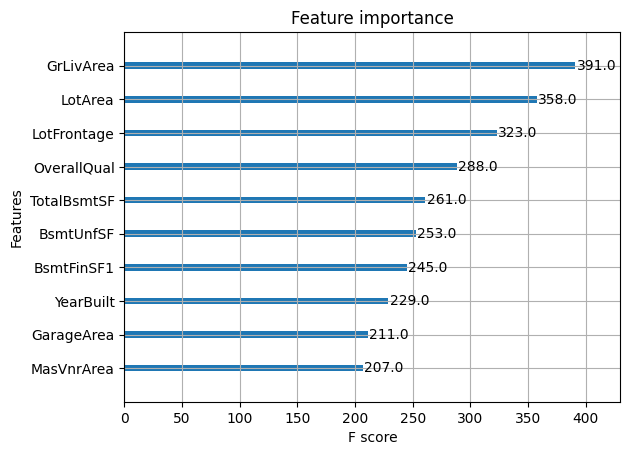

In [35]:
import matplotlib.pyplot as plt

xgb.plot_importance(best_model, importance_type='weight', max_num_features=10)
plt.show()


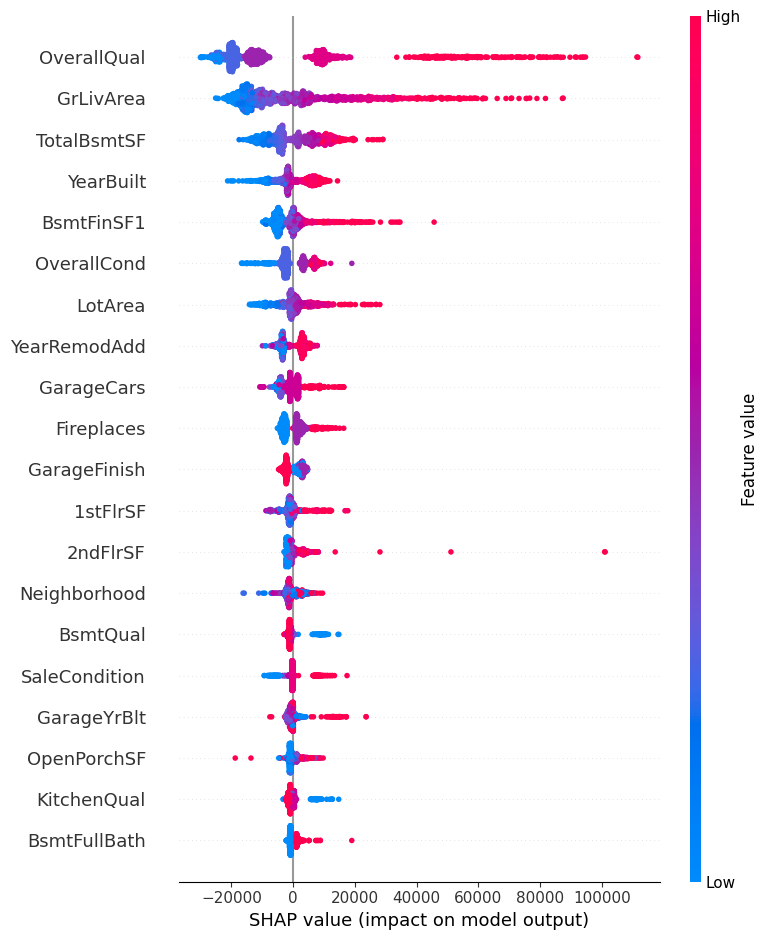

In [37]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)
